# **Insper - Eletromagnetismo e Ondulatória** #


**Modelagem Projeto Eletromag. (Parte 2 do Projeto)**

In [135]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import *

In [136]:
R1 = 1
R2 = 1
L1 = 10e-3
L2 = L1
C1 = 100e-6
C2 = C1
K = 0.2
M = (sqrt(L1*L2))*K

In [137]:
f = 60*10**3
W = 2*pi*f
Ufonte = 110
XL1 = 1j * W * L1
XL2 = 1j * W * L2
XM = 1j * W * M
XC1 = 1/(1j * W * C1)
XC2 = 1/(1j * W * C2)

*Modelo Paralelo*

In [138]:

def CalcularParalelo(Uf, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2/(Rc+XC2))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [139]:
Rcarga = 6
i1, i2 = CalcularParalelo(Ufonte, Rcarga)

print('No modelo em paralelo, com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))





No modelo em paralelo, com resistor na saída de 6.00 Ω:
i1 (eficaz) = 0.03 A
i2 (eficaz) = 0.01 A
V1 (eficaz): 110.00 V
V2 (eficaz): 0.04 V
Relação N1/N2: 1.00
Relação i2/i1: 0.20
Relação V1/V2: 3015.88


*Modelo em Série*

In [140]:
def CalcularEmSerie(Uf, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+XC2+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [141]:
Rcarga = 5
i1, i2 = CalcularEmSerie(Ufonte, Rcarga)

print('No modelo em série, com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))

No modelo em série, com resistor na saída de 5.00 Ω:
i1 (eficaz) = 0.03 A
i2 (eficaz) = 0.01 A
V1 (eficaz): 110.00 V
V2 (eficaz): 0.03 V
Relação N1/N2: 1.00
Relação i2/i1: 0.20
Relação V1/V2: 3619.07


**Simulação do Circuito (Parte 3 do Projeto)**

*Modelo em Série*

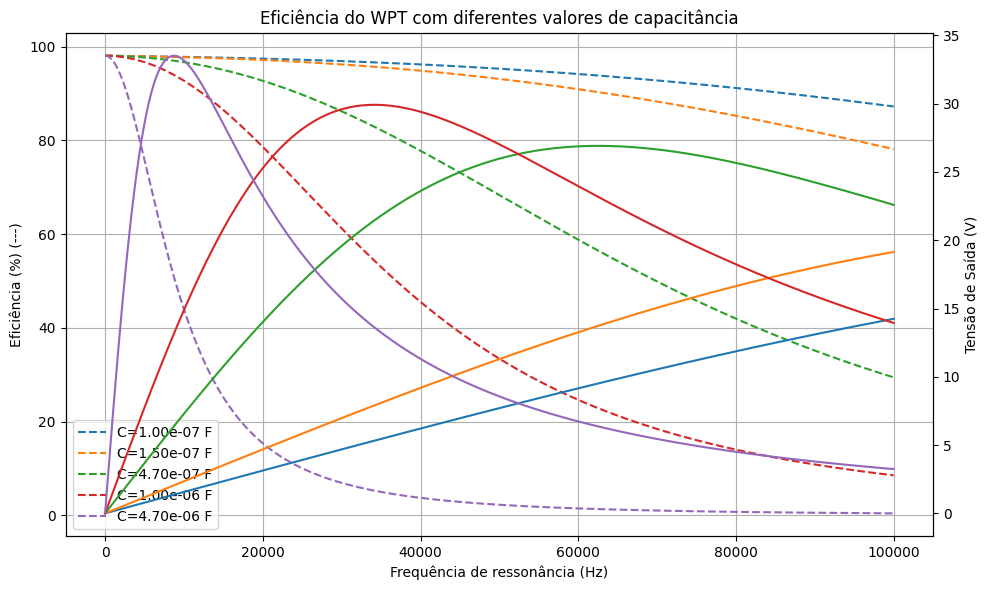

In [142]:
# Gráfico da eficiência do WPT com diferentes valores de capacitância

C_values = [1e-7, 1.5e-7, 4.7e-7, 1e-6, 4.7e-6]
Ufonte = 10
R_DC = 0.1 #lab
K = 0.2
Rcarga = 5

def calcular_resistencia_pelicular(R_DC, f):
    return R_DC + (R_DC / 100e3)*f

def calcular_eficiencia(Ufonte, I1, Usaida, I2):

    P_saida = np.real(0.5 * Usaida * np.conjugate(I2))
    P_entrada = np.real(0.5 * Ufonte * np.conjugate(I1))
    eficiencia = P_saida / P_entrada
    return eficiencia


def SimularCircuito(C_values, R_DC, Ufonte):
    fig, ax1 = plt.subplots(figsize=(10, 6))
                            
    ax2 = ax1.twinx()
    ax1.set_xlabel('Frequência de ressonância (Hz)')
    ax1.set_ylabel('Eficiência (%) (---)')
    ax2.set_ylabel('Tensão de Saída (V)')
    
    for C in C_values:
        eficiencia = []
        tensao_saida = []
        frequencias = []
        freq_max = 100e3

        for f in np.linspace(1, freq_max+1, 1000):
            R_f = calcular_resistencia_pelicular(R_DC, f)
            
            # Redefinindo os parâmetros do circuito
            W = 2 * pi * f
            L = 1/(W**2 * C)
            M = L*K #(sqrt(L**2))*K
            XL1 = 1j * W * L
            XL2 = XL1
            XM = 1j * W * M
            XC1 = 1/(1j * W * C)
            XC2 = XC1

            def CalcularEmSerie(Ufonte, Rcarga):
                Z=np.array([[R_f + XL1 + XC1, -XM],[-XM, XL2 + R_f + XC2 + Rcarga]])
                V=np.array([Ufonte, 0])
                i=np.dot(linalg.inv(Z), V)
                return i[0], i[1]

            I1_f, I2_f = CalcularEmSerie(Ufonte, Rcarga)
            Usaida = I2_f * Rcarga
            
            eficiencia_f = calcular_eficiencia(Ufonte, I1_f, Usaida, I2_f)
            eficiencia.append(eficiencia_f * 100)
            tensao_saida.append(np.abs(Usaida))
            frequencias.append(f)

        ax1.plot(frequencias, eficiencia, label=f'C={C:.2e} F', linestyle='--')
        ax2.plot(frequencias, tensao_saida)

    ax1.set_title('Eficiência do WPT com diferentes valores de capacitância')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

SimularCircuito(C_values, R_DC, Ufonte)

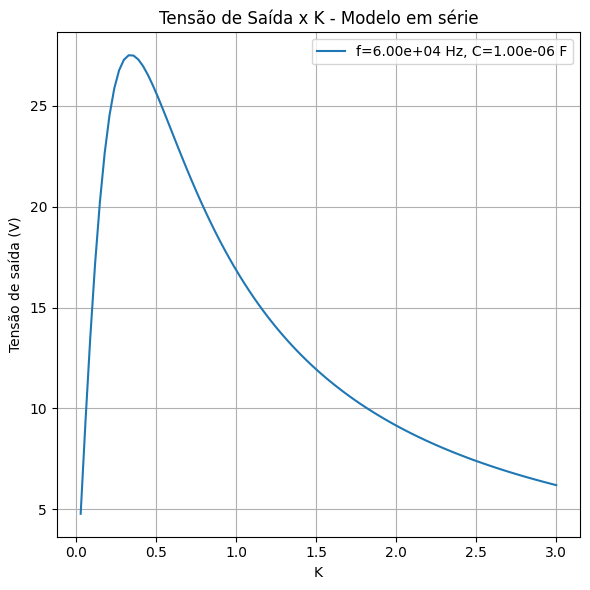

In [143]:
# Gráfico Tensão de Saída x K

C = 1e-6 # Suponha que C = 1uF
f = 60e3 # Suponha que f = 60kHz
Ufonte = 10
R_DC = 0.1 # Determinado experimentalmente
Rcarga = 5 # Determinado experimentalmente
Kmax = 3

ListUsaida = []
listK = []

def SimularCircuito(C_values, R_DC, Ufonte):

    R_f = calcular_resistencia_pelicular(R_DC, f)

    fig, ax1 = plt.subplots(figsize=(6, 6))
                            
    ax1.set_xlabel('K')
    ax1.set_ylabel('Tensão de saída (V)')

    W = 2 * pi * f
    L = 1/(W**2 * C)
    XL1 = 1j * W * L
    XL2 = XL1
    XC1 = 1/(1j * W * C)
    XC2 = XC1

    for K in np.linspace(0.03, Kmax, 100):
        
        # Redefinindo os parâmetros do circuito
        M = L*K #(sqrt(L**2))*K
        XM = 1j * W * M

        def CalcularEmSerie(Ufonte, Rcarga):
            Z=np.array([[R_f + XL1 + XC1, -XM],[-XM, XL2 + R_f + XC2 + Rcarga]])
            V=np.array([Ufonte, 0])
            i=np.dot(linalg.inv(Z), V)
            return i[0], i[1]

        I1_f, I2_f = CalcularEmSerie(Ufonte, Rcarga)
        Usaida = I2_f * Rcarga

        ListUsaida.append(np.abs(Usaida))
        listK.append(K)
    
    ax1.plot(listK, ListUsaida, label=f'f={f:.2e} Hz, C={C:.2e} F')
    ax1.set_title('Tensão de Saída x K - Modelo em série')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

SimularCircuito(C, R_DC, Ufonte)

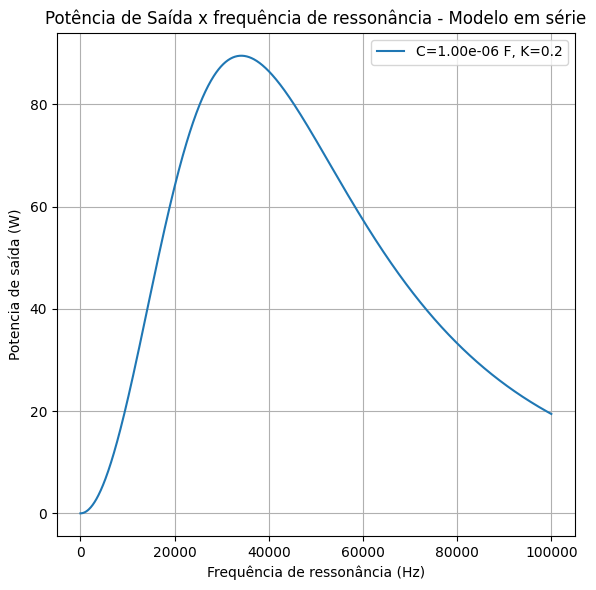

In [144]:
# Gráfico Psaida x f

C = 1e-6 # Suponha que C = 1uF
Ufonte = 10
R_DC = 0.1 # Determinado experimentalmente
K = 0.2 # Determinado experimentalmente
Rcarga = 5 # Determinado experimentalmente
freq_max = 100e3

ListPsaida = []
frequencias = []

def SimularCircuito(C_values, R_DC, Ufonte):
    fig, ax1 = plt.subplots(figsize=(6, 6))
                            
    ax1.set_xlabel('Frequência de ressonância (Hz)')
    ax1.set_ylabel('Potencia de saída (W)')

    for f in np.linspace(1, freq_max+1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)
        
        # Redefinindo os parâmetros do circuito
        W = 2 * pi * f
        L = 1/(W**2 * C)
        M = L*K #(sqrt(L**2))*K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1/(1j * W * C)
        XC2 = XC1

        def CalcularEmSerie(Ufonte, Rcarga):
            Z=np.array([[R_f + XL1 + XC1, -XM],[-XM, XL2 + R_f + XC2 + Rcarga]])
            V=np.array([Ufonte, 0])
            i=np.dot(linalg.inv(Z), V)
            return i[0], i[1]

        I1_f, I2_f = CalcularEmSerie(Ufonte, Rcarga)
        Usaida = I2_f * Rcarga

        Psaida = np.real(0.5 * Usaida * np.conjugate(I2_f))

        ListPsaida.append(Psaida)
        frequencias.append(f)

    
    ax1.plot(frequencias, ListPsaida, label=f'C={C:.2e} F, K={K}')
    ax1.set_title('Potência de Saída x frequência de ressonância - Modelo em série')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

SimularCircuito(C, R_DC, Ufonte)

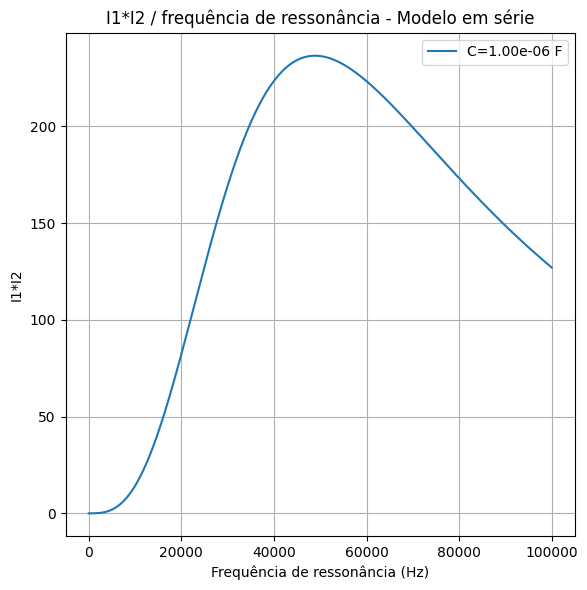

In [145]:
# Gráfico I1*I2 x f

C = 1e-6 # Suponha que C = 1uF
Ufonte = 10
R_DC = 0.1 # Determinado experimentalmente
K = 0.2 # Determinado experimentalmente
Rcarga = 5 # Determinado experimentalmente
freq_max = 100e3

I1I2 = []
frequencias = []

def SimularCircuito(C_values, R_DC, Ufonte):
    fig, ax1 = plt.subplots(figsize=(6, 6))
                            
    ax1.set_xlabel('Frequência de ressonância (Hz)')
    ax1.set_ylabel('I1*I2')

    for f in np.linspace(1, freq_max+1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)
        
        # Redefinindo os parâmetros do circuito
        W = 2 * pi * f
        L = 1/(W**2 * C)
        M = L*K #(sqrt(L**2))*K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1/(1j * W * C)
        XC2 = XC1

        def CalcularEmSerie(Ufonte, Rcarga):
            Z=np.array([[R_f + XL1 + XC1, -XM],[-XM, XL2 + R_f + XC2 + Rcarga]])
            V=np.array([Ufonte, 0])
            i=np.dot(linalg.inv(Z), V)
            return i[0], i[1]

        I1_f, I2_f = CalcularEmSerie(Ufonte, Rcarga)

        I1I2.append(np.abs(I1_f * I2_f))
        frequencias.append(f)
    
    ax1.plot(frequencias, I1I2, label=f'C={C:.2e} F')
    ax1.set_title('I1*I2 / frequência de ressonância - Modelo em série')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

SimularCircuito(C, R_DC, Ufonte)

*Modelo em Paralelo*

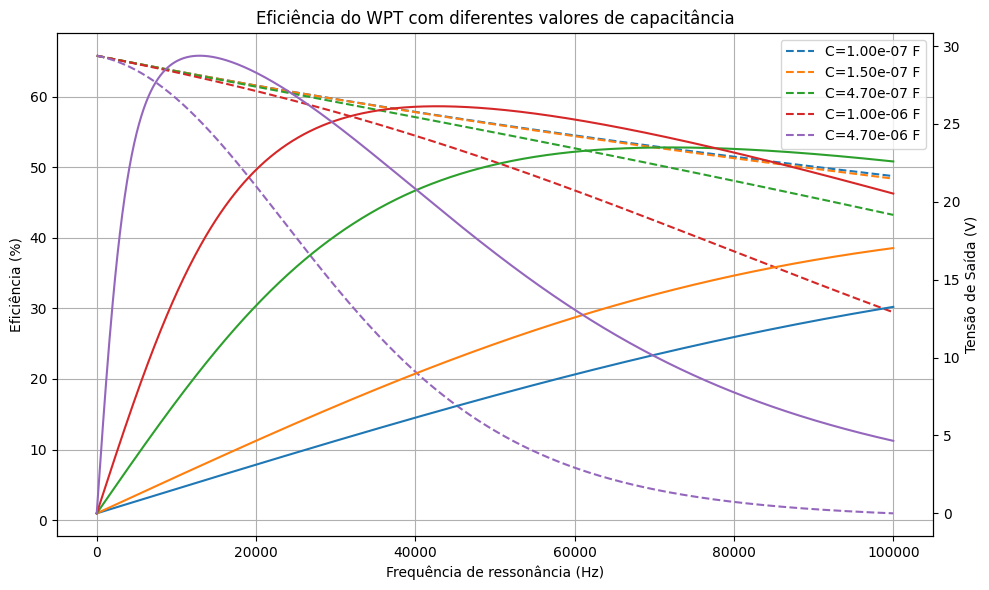

In [146]:
# Gráfico da eficiência do WPT com diferentes valores de capacitância

C_values = [1e-7, 1.5e-7, 4.7e-7, 1e-6, 4.7e-6]
Ufonte = 10
R_DC = 0.1 #lab
K = 0.2
Rcarga = 5

def calcular_resistencia_pelicular(R_DC, f):
    return R_DC + (R_DC / 100e3)*f

def calcular_eficiencia(Ufonte, I1, Usaida, I2):

    P_saida = np.real(0.5 * Usaida * np.conjugate(I2))
    P_entrada = np.real(0.5 * Ufonte * np.conjugate(I1))
    eficiencia = P_saida / P_entrada
    return eficiencia


def simular_eficiencia(C_values, R_DC, Ufonte):
    fig, ax1 = plt.subplots(figsize=(10, 6))
                            
    ax2 = ax1.twinx()
    ax1.set_xlabel('Frequência de ressonância (Hz)')
    ax1.set_ylabel('Eficiência (%)')
    ax2.set_ylabel('Tensão de Saída (V)')
    
    for C in C_values:
        eficiencia = []
        tensao_saida = []
        frequencias = []
        freq_max = 100e3

        for f in np.linspace(1, freq_max+1, 1000):
            R_f = calcular_resistencia_pelicular(R_DC, f)
            
            # Redefinindo os parâmetros do circuito
            W = 2 * pi * f
            L = 1/(W**2 * C)
            M = L*K #(sqrt(L**2))*K
            XL1 = 1j * W * L
            XL2 = XL1
            XM = 1j * W * M
            XC1 = 1/(1j * W * C)
            XC2 = XC1
            Z = (Rcarga*XC2/(Rcarga+XC2))

            def CalcularParalelo(Ufonte, Rcarga):
                Z=np.array([[R_f+XL1+XC1, -XM],[-XM, XL2+R_f+(Rcarga*XC2/(Rcarga+XC2))]])
                V=np.array([Ufonte,0])
                i=np.dot(linalg.inv(Z),V)
                return i[0], i[1]

            I1_f, I2_f = CalcularParalelo(Ufonte, Rcarga)
            Usaida = I2_f * Z
            
            eficiencia_f = calcular_eficiencia(Ufonte, I1_f, Usaida, I2_f)
            eficiencia.append(eficiencia_f * 100)
            tensao_saida.append(np.abs(Usaida))
            frequencias.append(f)

        ax1.plot(frequencias, eficiencia, label=f'C={C:.2e} F', linestyle='--')
        ax2.plot(frequencias, tensao_saida)

    ax1.set_title('Eficiência do WPT com diferentes valores de capacitância')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

simular_eficiencia(C_values, R_DC, Ufonte)

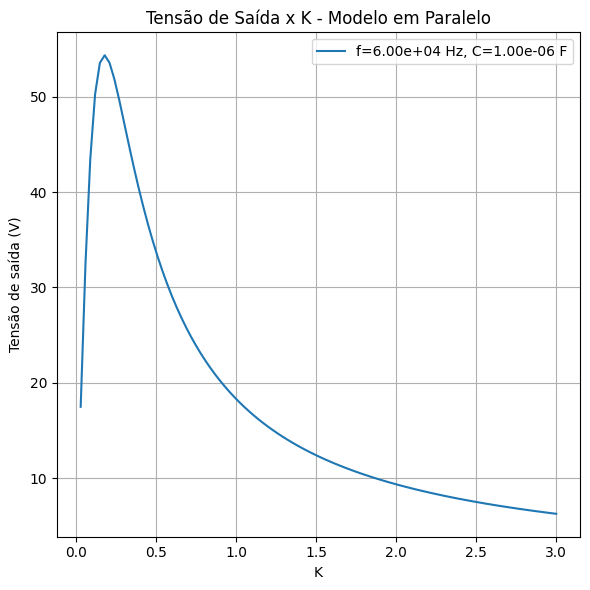

In [147]:
# Gráfico Tensão de Saída x K

C = 1e-6 # Suponha que C = 1uF
f = 60e3 # Suponha que f = 60kHz
Ufonte = 10
R_DC = 0.1 # Determinado experimentalmente
Rcarga = 5 # Determinado experimentalmente
Kmax = 3

ListUsaida = []
listK = []

def SimularCircuito(C_values, R_DC, Ufonte):

    R_f = calcular_resistencia_pelicular(R_DC, f)

    fig, ax1 = plt.subplots(figsize=(6, 6))
                            
    ax1.set_xlabel('K')
    ax1.set_ylabel('Tensão de saída (V)')

    W = 2 * pi * f
    L = 1/(W**2 * C)
    XL1 = 1j * W * L
    XL2 = XL1
    XC1 = 1/(1j * W * C)
    XC2 = XC1

    for K in np.linspace(0.03, Kmax, 100):
        
        # Redefinindo os parâmetros do circuito
        M = L*K #(sqrt(L**2))*K
        XM = 1j * W * M

        def CalcularParalelo(Ufonte, Rcarga):
            Z=np.array([[R_f+XL1+XC1, -XM],[-XM, XL2+R_f+(Rcarga*XC2/(Rcarga+XC2))]])
            V=np.array([Ufonte,0])
            i=np.dot(linalg.inv(Z),V)
            return i[0], i[1]

        I1_f, I2_f = CalcularParalelo(Ufonte, Rcarga)
        Usaida = I2_f * Rcarga

        ListUsaida.append(np.abs(Usaida))
        listK.append(K)
    
    ax1.plot(listK, ListUsaida, label=f'f={f:.2e} Hz, C={C:.2e} F')
    ax1.set_title('Tensão de Saída x K - Modelo em Paralelo')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

SimularCircuito(C, R_DC, Ufonte)

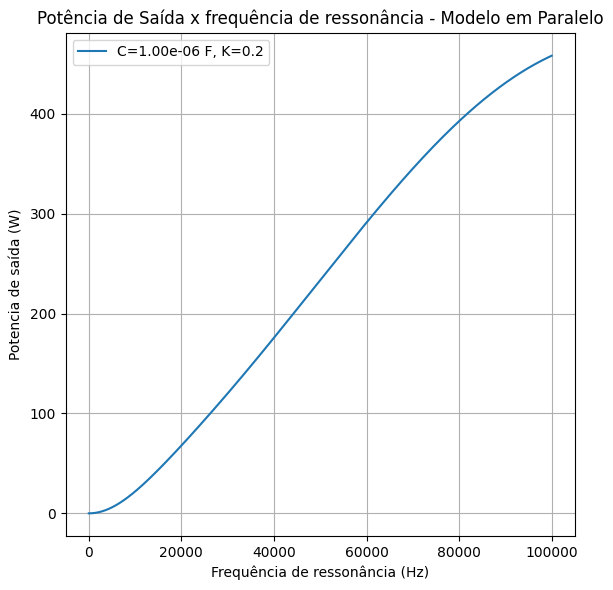

In [148]:
# Gráfico Psaida x f

C = 1e-6 # Suponha que C = 1uF
Ufonte = 10
R_DC = 0.1 # Determinado experimentalmente
K = 0.2 # Determinado experimentalmente
Rcarga = 5 # Determinado experimentalmente
freq_max = 100e3

ListPsaida = []
frequencias = []

def SimularCircuito(C_values, R_DC, Ufonte):
    fig, ax1 = plt.subplots(figsize=(6, 6))
                            
    ax1.set_xlabel('Frequência de ressonância (Hz)')
    ax1.set_ylabel('Potencia de saída (W)')

    for f in np.linspace(1, freq_max+1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)
        
        # Redefinindo os parâmetros do circuito
        W = 2 * pi * f
        L = 1/(W**2 * C)
        M = L*K #(sqrt(L**2))*K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1/(1j * W * C)
        XC2 = XC1

        def CalcularParalelo(Ufonte, Rcarga):
            Z=np.array([[R_f+XL1+XC1, -XM],[-XM, XL2+R_f+(Rcarga*XC2/(Rcarga+XC2))]])
            V=np.array([Ufonte,0])
            i=np.dot(linalg.inv(Z),V)
            return i[0], i[1]

        I1_f, I2_f = CalcularParalelo(Ufonte, Rcarga)
        Usaida = I2_f * Rcarga

        Psaida = np.real(0.5 * Usaida * np.conjugate(I2_f))

        ListPsaida.append(Psaida)
        frequencias.append(f)

    
    ax1.plot(frequencias, ListPsaida, label=f'C={C:.2e} F, K={K}')
    ax1.set_title('Potência de Saída x frequência de ressonância - Modelo em Paralelo')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

SimularCircuito(C, R_DC, Ufonte)

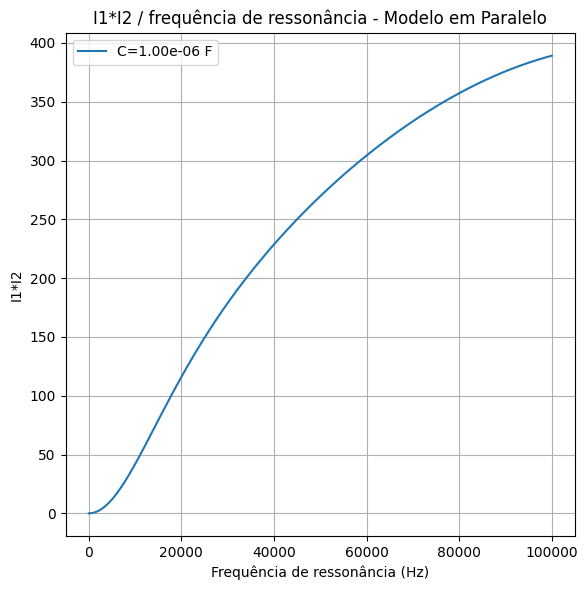

In [149]:
# Gráfico I1*I2 x f

C = 1e-6 # Suponha que C = 1uF
Ufonte = 10
R_DC = 0.1 # Determinado experimentalmente
K = 0.2 # Determinado experimentalmente
Rcarga = 5 # Determinado experimentalmente
freq_max = 100e3

I1I2 = []
frequencias = []

def SimularCircuito(C_values, R_DC, Ufonte):
    fig, ax1 = plt.subplots(figsize=(6, 6))
                            
    ax1.set_xlabel('Frequência de ressonância (Hz)')
    ax1.set_ylabel('I1*I2')

    for f in np.linspace(1, freq_max+1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)
        
        # Redefinindo os parâmetros do circuito
        W = 2 * pi * f
        L = 1/(W**2 * C)
        M = L*K #(sqrt(L**2))*K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1/(1j * W * C)
        XC2 = XC1

        def CalcularParalelo(Ufonte, Rcarga):
            Z=np.array([[R_f+XL1+XC1, -XM],[-XM, XL2+R_f+(Rcarga*XC2/(Rcarga+XC2))]])
            V=np.array([Ufonte,0])
            i=np.dot(linalg.inv(Z),V)
            return i[0], i[1]

        I1_f, I2_f = CalcularParalelo(Ufonte, Rcarga)

        I1I2.append(np.abs(I1_f * I2_f))
        frequencias.append(f)
    
    ax1.plot(frequencias, I1I2, label=f'C={C:.2e} F')
    ax1.set_title('I1*I2 / frequência de ressonância - Modelo em Paralelo')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

SimularCircuito(C, R_DC, Ufonte)